## Assignment 5 - Helper Functions

In [25]:
import pandas as pd
import matplotlib.pyplot as pl
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 
import numpy as np

In [26]:
%pylab inline

# (c) 2014 Reid Johnson and Everaldo Aguiar
#
# Functions to work with continuous data and linear regression models.

import matplotlib.pyplot as pl

def pairs(data):
    """Generates and shows a pairwise scatterplot of the dataset features.

    A figure with nxn scatterplots is generated, where n is the number of features. The features are
    defined as the all columns excluding the final column, which is defined as the class.

    Args:
      data (array): A dataset.

    """
    i = 1

    # Divide columns into features and class.
    features = list(data.columns)
    classes = features[-1] # create class column
    del features[-1] # delete class column from feature vector

    # Generate an nxn subplot figure, where n is the number of features.
    figure = pl.figure(figsize=(5*(len(data.columns)-1), 4*(len(data.columns)-1)))
    for col1 in data[features]:
        for col2 in data[features]:
            ax = pl.subplot(len(data.columns)-1, len(data.columns)-1, i)
            if col1 == col2:
                ax.text(2.5, 4.5, col1, style='normal', fontsize=20)
                ax.axis([0, 10, 0, 10])
                pl.xticks([]), pl.yticks([])
            else:
                for name in data[classes]:
                    cond = data[classes] == name
                    ax.plot(data[col2][cond], data[col1][cond], linestyle='none', marker='o', label=name)
                #t = plt.title(name)
            i += 1

    pl.show()

Populating the interactive namespace from numpy and matplotlib


In [27]:
# Load Iris Dataset
fileURL = 'http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
iris = pd.read_csv(fileURL, names=['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width', 'Species'], header=None)
iris = iris.dropna()

In [28]:
iris.head(5)

,Sepal Length,Sepal Width,Petal Length,Petal Width,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


# A scatterplot matrix of scatterplots, with one scatterplot for each pairwise combination of features.

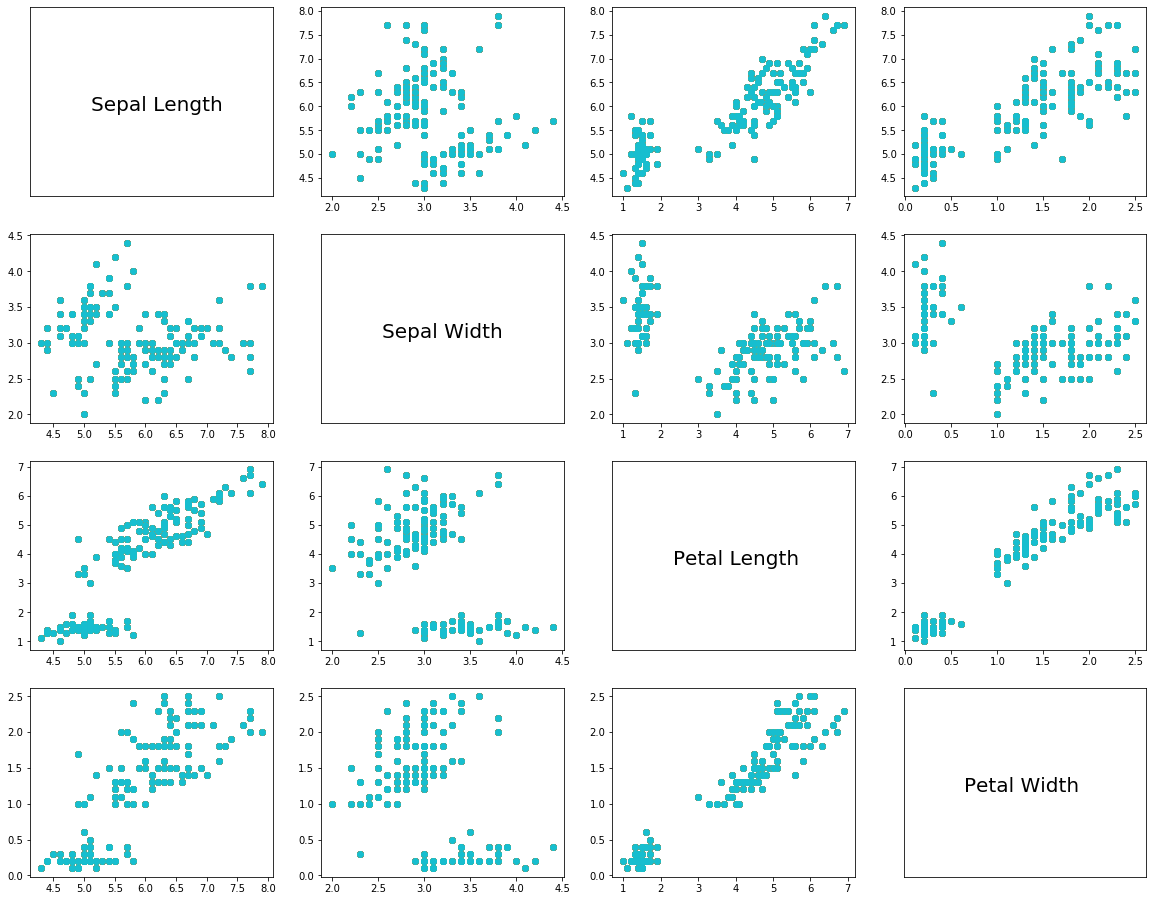

In [44]:
pairs(iris)

# A plot of the linear regression models generated on each pairwise combination of features, with corresponding model statistics.

In [92]:
def get_train_test_data(predictor, target):
    X = iris[predictor]
    Y = iris[target]
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size = 0.8)
    return X_train, X_test, Y_train, Y_test

In [93]:
def linear_regression(linear_regression, X_train, X_test, Y_train, Y_test):
    linreg.fit(X_train, Y_train)
    print ("Coefficient: ", linear_regression.coef_)
    print ("Mean Square Error: %.2f" % np.mean((linear_regression.predict(X_test) - Y_test) ** 2))
    print ("Variance Score: %.2f" % linear_regression.score(X_test, Y_test))


In [94]:
def plot_two_dimension_output(linear_regression, predictor, target, X_test, Y_test):
    pl.scatter(X_test, Y_test,  color='blue')
    pl.plot(X_test, linear_regression.predict(X_test), color='red', linewidth=2.5)
    pl.xlabel(predictor[0])
    pl.ylabel(target[0])
    pl.show()

In [95]:
linreg = LinearRegression()

predictor:- ['Sepal Width'] Target:- ['Sepal Length']
Coefficient:  [[-0.19891501]]
Mean Square Error: 0.50
Variance Score: -0.30


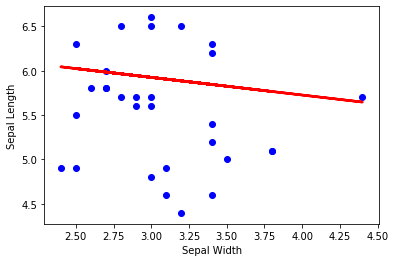

predictor:- ['Petal Length'] Target:- ['Sepal Length']
Coefficient:  [[0.42578867]]
Mean Square Error: 0.25
Variance Score: 0.55


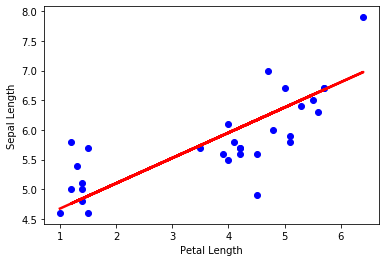

predictor:- ['Petal Width'] Target:- ['Sepal Length']
Coefficient:  [[0.87424789]]
Mean Square Error: 0.15
Variance Score: 0.72


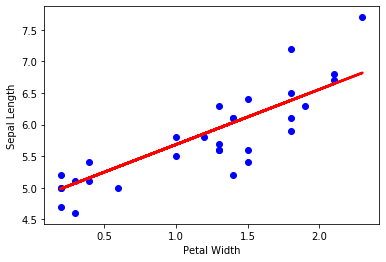

predictor:- ['Sepal Length'] Target:- ['Sepal Width']
Coefficient:  [[-0.01856474]]
Mean Square Error: 0.23
Variance Score: 0.02


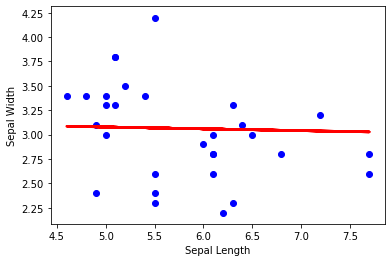

predictor:- ['Petal Length'] Target:- ['Sepal Width']
Coefficient:  [[-0.09989388]]
Mean Square Error: 0.21
Variance Score: 0.15


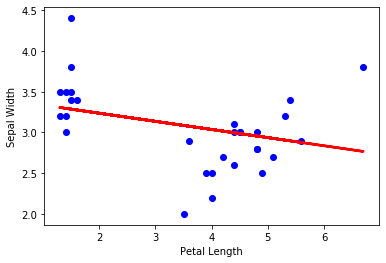

predictor:- ['Petal Width'] Target:- ['Sepal Width']
Coefficient:  [[-0.22676732]]
Mean Square Error: 0.14
Variance Score: -0.08


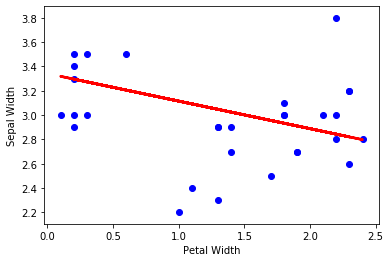

predictor:- ['Sepal Length'] Target:- ['Petal Length']
Coefficient:  [[1.87017594]]
Mean Square Error: 0.56
Variance Score: 0.79


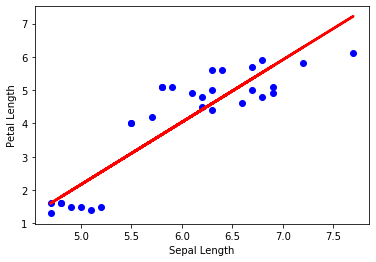

predictor:- ['Sepal Width'] Target:- ['Petal Length']
Coefficient:  [[-1.61051891]]
Mean Square Error: 2.44
Variance Score: 0.21


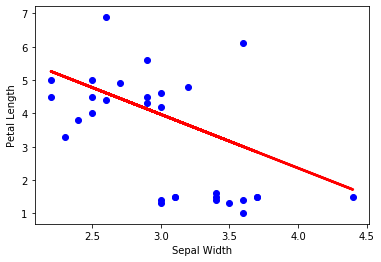

predictor:- ['Petal Width'] Target:- ['Petal Length']
Coefficient:  [[2.23133437]]
Mean Square Error: 0.16
Variance Score: 0.95


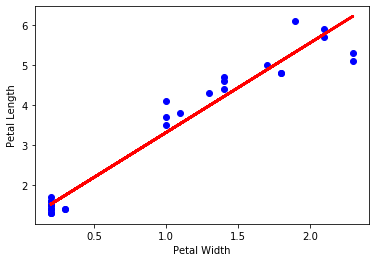

predictor:- ['Sepal Length'] Target:- ['Petal Width']
Coefficient:  [[0.79722714]]
Mean Square Error: 0.28
Variance Score: 0.61


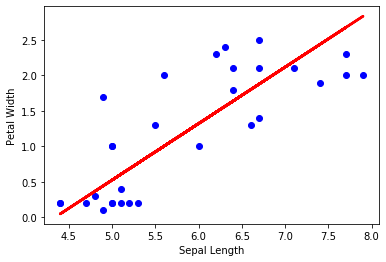

predictor:- ['Sepal Width'] Target:- ['Petal Width']
Coefficient:  [[-0.5801058]]
Mean Square Error: 0.43
Variance Score: 0.08


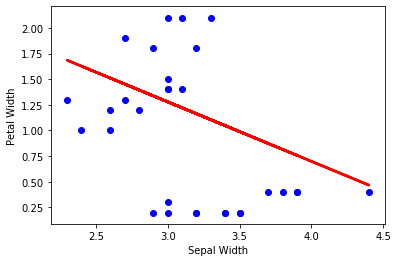

predictor:- ['Petal Length'] Target:- ['Petal Width']
Coefficient:  [[0.41604339]]
Mean Square Error: 0.03
Variance Score: 0.95


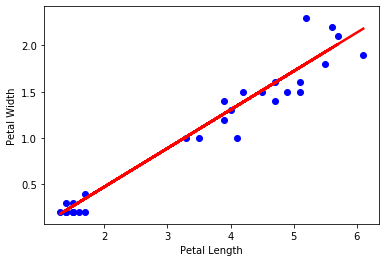

In [160]:
for column_a in range(4):
    for column_b in range(4):
        if column_a != column_b:
            target = [iris.columns.values[column_a]]
            predictor = [iris.columns.values[column_b]]
            print("predictor:- "+str(predictor)+" Target:- "+str(target))
            X_train, X_test, Y_train, Y_test = get_train_test_data(predictor, target);
            linear_regression(linreg, X_train, X_test, Y_train, Y_test)
            plot_two_dimension_output(linreg, predictor, target, X_test, Y_test)

In [116]:
predictor = ['Sepal Width', 'Petal Width']
target = 'Petal Length'
X_train, X_test, Y_train, Y_test = get_train_test_data(predictor, target);
linear_regression(linreg, X_train, X_test, Y_train, Y_test)

Coefficient:  [-0.36798189  2.1464455 ]
Mean Square Error: 0.22
Variance Score: 0.92


In [117]:
predictor = ['Sepal Length', 'Petal Length']
target = 'Sepal Width'
X_train, X_test, Y_train, Y_test = get_train_test_data(predictor, target);
linear_regression(linreg, X_train, X_test, Y_train, Y_test)

Coefficient:  [ 0.60148585 -0.34635863]
Mean Square Error: 0.09
Variance Score: 0.41


In [118]:
predictor = ['Sepal Length', 'Petal Width']
target = 'Sepal Width'
X_train, X_test, Y_train, Y_test = get_train_test_data(predictor, target);
linear_regression(linreg, X_train, X_test, Y_train, Y_test)

Coefficient:  [ 0.34898122 -0.49801541]
Mean Square Error: 0.14
Variance Score: 0.02


In [119]:
predictor = ['Sepal Width', 'Sepal Length']
target = 'Petal Length'
X_train, X_test, Y_train, Y_test = get_train_test_data(predictor, target);
linear_regression(linreg, X_train, X_test, Y_train, Y_test)

Coefficient:  [-1.35098726  1.7994777 ]
Mean Square Error: 0.34
Variance Score: 0.89


In [139]:
predictor = ['Petal Length', 'Sepal Length']
target = 'Petal Width'
X_train, X_test, Y_train, Y_test = get_train_test_data(predictor, target);
linear_regression(linreg, X_train, X_test, Y_train, Y_test)

Coefficient:  [ 0.45468071 -0.11183703]
Mean Square Error: 0.06
Variance Score: 0.90


In [145]:
predictor = ['Petal Length', 'Sepal Width']
target = 'Petal Width'
X_train, X_test, Y_train, Y_test = get_train_test_data(predictor, target);
linear_regression(linreg, X_train, X_test, Y_train, Y_test)

Coefficient:  [0.43246511 0.13034828]
Mean Square Error: 0.04
Variance Score: 0.93


In [122]:
predictor = ['Sepal Length', 'Sepal Width']
target = 'Petal Length'
X_train, X_test, Y_train, Y_test = get_train_test_data(predictor, target);
linear_regression(linreg, X_train, X_test, Y_train, Y_test)

Coefficient:  [ 1.85846521 -1.35463824]
Mean Square Error: 0.61
Variance Score: 0.69


In [123]:
predictor = ['Sepal Length', 'Petal Width']
target = 'Petal Length'
X_train, X_test, Y_train, Y_test = get_train_test_data(predictor, target);
linear_regression(linreg, X_train, X_test, Y_train, Y_test)

Coefficient:  [0.60444623 1.72071635]
Mean Square Error: 0.20
Variance Score: 0.94


In [128]:
predictor = ['Sepal Length', 'Sepal Width']
target = 'Petal Width'
X_train, X_test, Y_train, Y_test = get_train_test_data(predictor, target);
linear_regression(linreg, X_train, X_test, Y_train, Y_test)

Coefficient:  [ 0.6765705  -0.55418067]
Mean Square Error: 0.21
Variance Score: 0.70


In [151]:
predictor = ['Sepal Length', 'Petal Length']
target = 'Petal Width'
X_train, X_test, Y_train, Y_test = get_train_test_data(predictor, target);
linear_regression(linreg, X_train, X_test, Y_train, Y_test)

Coefficient:  [-0.09544592  0.45284119]
Mean Square Error: 0.05
Variance Score: 0.92


In [126]:
predictor = ['Sepal Width', 'Petal Length']
target = 'Petal Width'
X_train, X_test, Y_train, Y_test = get_train_test_data(predictor, target);
linear_regression(linreg, X_train, X_test, Y_train, Y_test)

Coefficient:  [0.14835608 0.43834599]
Mean Square Error: 0.03
Variance Score: 0.95


In [130]:
predictor = ['Sepal Width', 'Sepal Length']
target = 'Petal Width'
X_train, X_test, Y_train, Y_test = get_train_test_data(predictor, target);
linear_regression(linreg, X_train, X_test, Y_train, Y_test)

Coefficient:  [-0.44611824  0.75683022]
Mean Square Error: 0.17
Variance Score: 0.73


In [159]:
predictor = ['Sepal Width', 'Sepal Length', 'Petal Length']
target = 'Petal Width'
X_train, X_test, Y_train, Y_test = get_train_test_data(predictor, target);
linear_regression(linreg, X_train, X_test, Y_train, Y_test)

Coefficient:  [ 0.23377373 -0.20065091  0.51999549]
Mean Square Error: 0.05
Variance Score: 0.92


In [135]:
predictor = ['Sepal Width', 'Sepal Length', 'Petal Width']
target = 'Petal Length'
X_train, X_test, Y_train, Y_test = get_train_test_data(predictor, target);
linear_regression(linreg, X_train, X_test, Y_train, Y_test)

Coefficient:  [-0.71957915  0.70752265  1.42621679]
Mean Square Error: 0.09
Variance Score: 0.97


In [136]:
predictor = ['Petal Width', 'Sepal Length', 'Petal Length']
target = 'Sepal Width'
X_train, X_test, Y_train, Y_test = get_train_test_data(predictor, target);
linear_regression(linreg, X_train, X_test, Y_train, Y_test)

Coefficient:  [ 0.65978967  0.60641425 -0.61783414]
Mean Square Error: 0.10
Variance Score: 0.42


In [138]:
predictor = ['Sepal Width', 'Petal Length', 'Petal Width']
target = 'Sepal Length'
X_train, X_test, Y_train, Y_test = get_train_test_data(predictor, target);
linear_regression(linreg, X_train, X_test, Y_train, Y_test)

Coefficient:  [ 0.65324653  0.69302367 -0.53726503]
Mean Square Error: 0.09
Variance Score: 0.87


# A plot of the best overall linear regression model you were able to generate using any combination of features (including the use of multiple features used in combination to predict a single feature), with corresponding model statistics.

### From the above pairwise regression models, I found the best combination of features to be Petal Width and Petal Length (Petal Length=>Petal Width) with the Mean Square Error of 0.03 and Variance Score of 0.94

Coefficient:  [0.41306222]
Mean Square Error: 0.03
Variance Score: 0.94


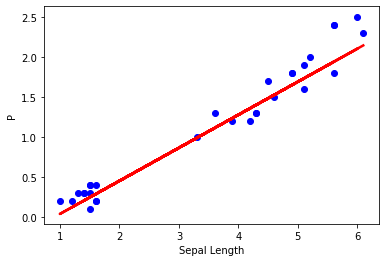

In [155]:
X_train, X_test, Y_train, Y_test = get_train_test_data(['Petal Length'], 'Petal Width');
linear_regression(linreg, X_train, X_test, Y_train, Y_test)
plot_two_dimension_output(linreg, predictor, target, X_test, Y_test)

## PART - B

## Based upon the linear models you generated, which pair of features appear to be most predictive for one another? Note that you can answer this question based upon the output provided for the linear models.

From the above results, the pair of features that are most predictive for one another are Petal Width and Petal Length (Petal Length=>Petal Width) with the Mean Square Error of 0.03 and Variance Score of 0.94. Looking at the graph clearly denotes that they fit the linear model perfectly.

Conversely, we see that (Petal Width => Petal Length) also fit the model accurately with 
Mean Square Error of 0.16 and Variance Score of 0.95

## Suppose you tried to generate a classification model on this dataset, but only after removing the feature that you were best able to predict based upon other features. How would removing this feature affect the classification performance?

In [186]:
from sklearn.linear_model import LogisticRegression

In [211]:
predictor = ['Sepal Width', 'Petal Length', 'Petal Width','Sepal Length']
target = 'Species'
X_train, X_test, Y_train, Y_test = get_train_test_data(predictor, target);
log_reg = LogisticRegression()
log_reg.fit(X_train, Y_train)
pred = log_reg.predict(X_test)
score = log_reg.score(X_test, Y_test)
print("Variance score: %.2f" % score)

Variance score: 0.97


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [212]:
#Without the 'Petal Width' feature

predictor = ['Sepal Width', 'Petal Length','Sepal Length']
target = 'Species'
X_train, X_test, Y_train, Y_test = get_train_test_data(predictor, target);
log_reg = LogisticRegression()
log_reg.fit(X_train, Y_train)
pred = log_reg.predict(X_test)
score = log_reg.score(X_test, Y_test)
print("Variance score: %.2f" % score)

Variance score: 0.97


After Removing the best predicted feature ('Petal Width'), we see that it does not have any significant impact on our classifier model. That's because, if a feature can be derived from other feature/features, it will contain data that can be deduced from other features, and it will just act as a redundant feature and can be discarded. Removing this redundant feature will have no significant impact on our model. In our case, Petal Width is the most predictable feature, and thus removing it does not significantly affect our model.